In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Predicting%20Employee%20Attrition/train_data.csv")

In [4]:
pd.set_option('display.max_columns',None)
df.head(1)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

<AxesSubplot:>

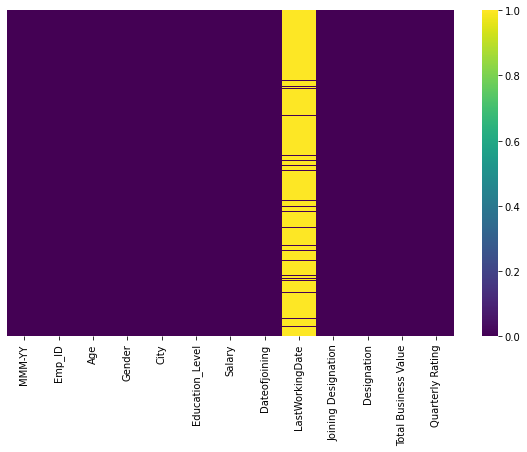

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [8]:
df.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [9]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['Year_of_join'] = df['Dateofjoining'].apply(lambda t:t.year)
df['Month_of_join'] = df['Dateofjoining'].apply(lambda t:t.month)
df['Day_of_join'] = df['Dateofjoining'].apply(lambda t:t.day)
df['Year_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.year)
df['Month_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.month)
df.drop(columns='Dateofjoining',inplace=True)
df['Attrition'] = np.nan
mypop = df.pop('Attrition')
df.insert(1,'Attrition',mypop)
mypop1 = df.pop('Year_of_join')
df.insert(8,'Year_of_join',mypop1)
mypop2 = df.pop('Month_of_join')
df.insert(9,'Month_of_join',mypop2)
mypop3 = df.pop('Day_of_join')
df.insert(10,'Day_of_join',mypop3)
df = df.astype({'Year_of_join':int,'Month_of_join':int,'Day_of_join':int})
df['Attrition']=np.where(df['LastWorkingDate'].isnull(),0,1)
df.drop(columns='LastWorkingDate',inplace=True)

In [10]:
df.head(3)

,MMM-YY,Attrition,Emp_ID,Age,Gender,City,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_leave,Month_of_leave
0,2016-01-01,0,1,28,Male,C23,Master,57387,2015,12,24,1,1,2381060,2,NaN,NaN
1,2016-02-01,0,1,28,Male,C23,Master,57387,2015,12,24,1,1,-665480,2,NaN,NaN
2,2016-03-01,1,1,28,Male,C23,Master,57387,2015,12,24,1,1,0,2,2016.0,3.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

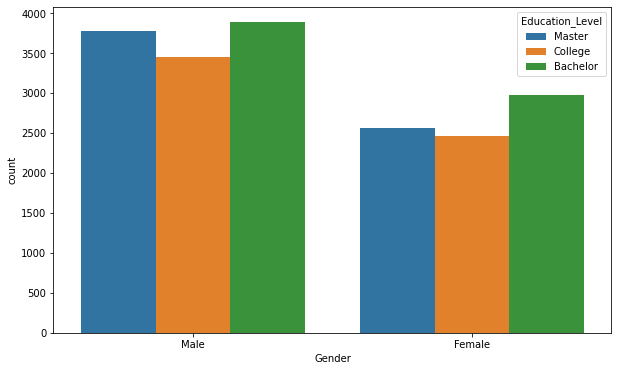

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender',hue='Education_Level')

<AxesSubplot:xlabel='Month_of_join', ylabel='Year_of_join'>

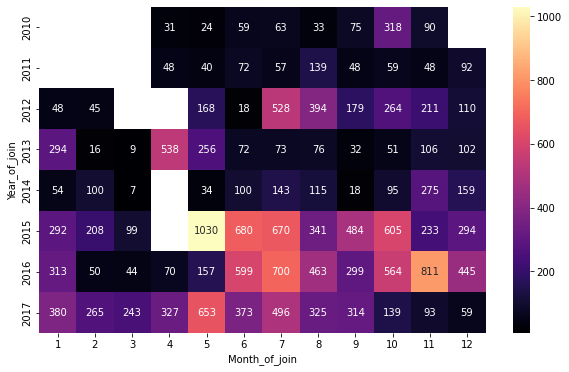

In [12]:
joiners = df.groupby(by=['Year_of_join','Month_of_join']).count()['Emp_ID'].unstack()
plt.figure(figsize=(10,6))
sns.heatmap(joiners,annot=True,fmt='.4g',cmap='magma')

In [13]:
df["Attrition"].value_counts()

0    17488
1     1616
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Month_of_leave', ylabel='Year_of_leave'>

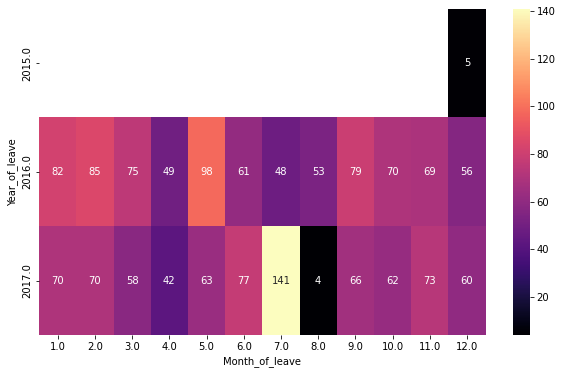

In [14]:
leavers = df.groupby(by=['Year_of_leave','Month_of_leave']).count()['Emp_ID'].unstack()
plt.figure(figsize=(10,6))
sns.heatmap(leavers,annot=True,fmt='.4g',cmap='magma')

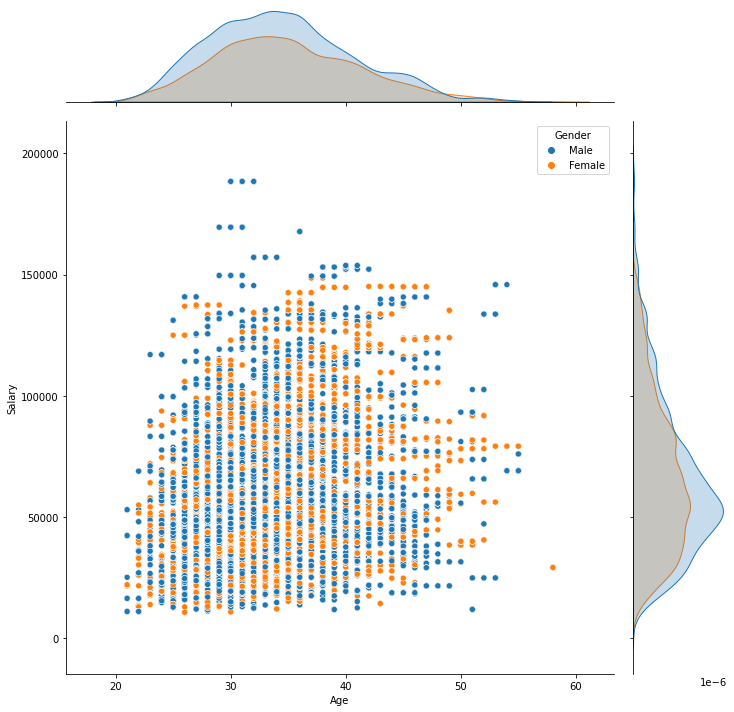

In [15]:
sns.jointplot(data=df,x='Age',y='Salary',hue='Gender',height=10)

<Figure size 720x432 with 0 Axes>

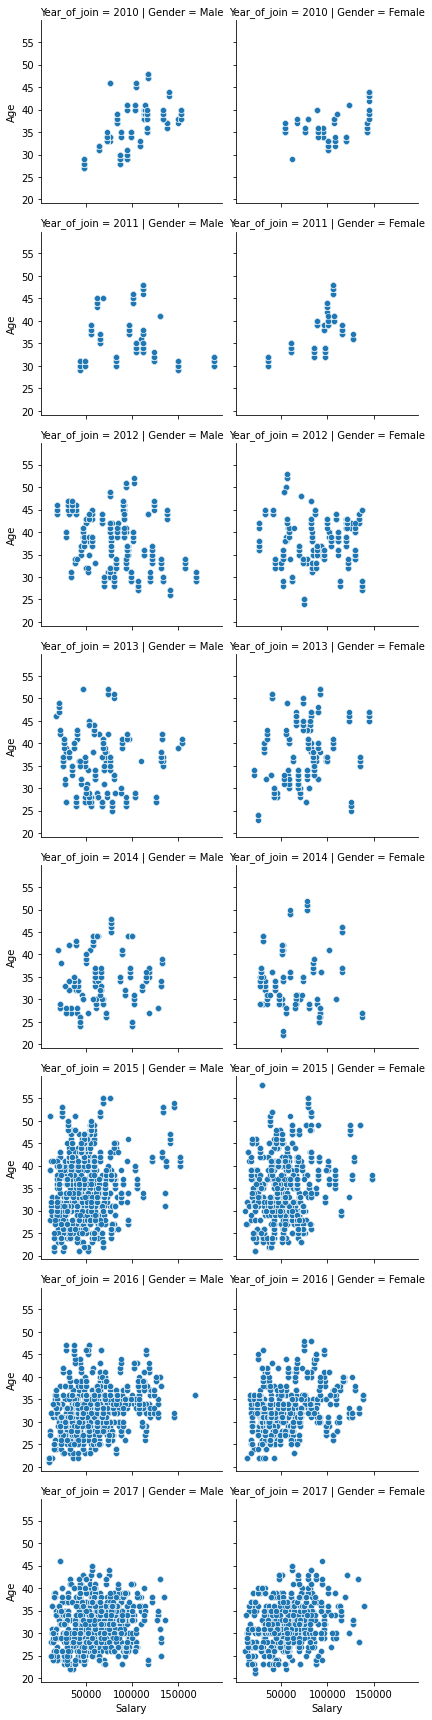

In [16]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(df, col="Gender",  row='Year_of_join')
fg.map(sns.scatterplot, "Salary", "Age")

In [17]:
df.groupby(by=['Education_Level','Gender','Attrition','City']).count()['Emp_ID'].unstack()

City                               C1  C10  C11  C12  C13  C14  C15  C16  C17  \
Education_Level Gender Attrition                                                
Bachelor        Female 0          131   58  170   74   84   48   90  118   73   
                       1            6    8    7    4    4    9    7    8    6   
                Male   0          186  127   66  186   91  108  244  148   87   
                       1            8   13    8   11   12   15   14    8    9   
College         Female 0           75   99   17   84   68   70   83   76   30   
                       1            9   12    3    7    7    5   12    7    6   
                Male   0           55  147   42  141  145  125   45  165   90   
                       1           10    8    6    9   11   11   14   14   12   
Master          Female 0           59   99   44   77   21   79   58   61   64   
                       1           14    6    7   10    8    7    7    5   11   
                Male   0          115  153   84  112  102  160  172   91   41   
                       1            9   14   14   12   16   11   15    8   11   

City                              C18  C19  C2  C20  C21  C22  C23  C24  C25  \
Education_Level Gender Attrition                                               
Bachelor        Female 0          132   34  66  141   97   72  109   97   34   
                       1           11    4   9   16    5    2    7    9    7   
                Male   0           43   95  91   95  188  168  118   58  144   
                       1            8   10  11   14   16    9    8    6   13   
College         Female 0           52   70  69  160   77   90   28   25  108   
                       1            5    7   8   13    7    7   12    3    6   
                Male   0           86  149  75  201  120  151   62  136  103   
                       1            8    7  10   29    8   11    8   13    7   
Master          Female 0           74   72  61  138   23  161   90   61   37   
                       1            4    6   6   17    5   12   11    4    5   
                Male   0          113  118  55  162   50  117   74  186  104   
                       1            8    7  11   22    7    9   11   16   16   

City                              C26  C27  C28  C29   C3   C4   C5   C6   C7  \
Education_Level Gender Attrition                                                
Bachelor        Female 0          107  119  109  190   52   69   45  106   60   
                       1            7   16    7   10    9    6    3    8   10   
                Male   0          207  110  140  132   92   93  156   78  143   
                       1           12   11   14    9    7   13    8    8   13   
College         Female 0          112  136   37   89  121   58   88   83   93   
                       1            9    8    8    1   11    5    8   14    9   
                Male   0          153  137  128  123   77   77   88  135   68   
                       1           14   12   10   11    9   13    7    8    5   
Master          Female 0           84  124   78   71  139  103   66  103   61   
                       1            6    4    4    7    8    7   11    8    7   
                Male   0          141  100  132  244  104  126  165  100  132   
                       1           17    9   16   13    8    8   11    9    8   

City                               C8   C9  
Education_Level Gender Attrition            
Bachelor        Female 0          162  114  
                       1            6    7  
                Male   0           68  114  
                       1            8   13  
College         Female 0          103   34  
                       1           10   10  
                Male   0           76   36  
                       1           18   10  
Master          Female 0          166   63  
                       1            7    7  
                Male   0           84  106  
                       1

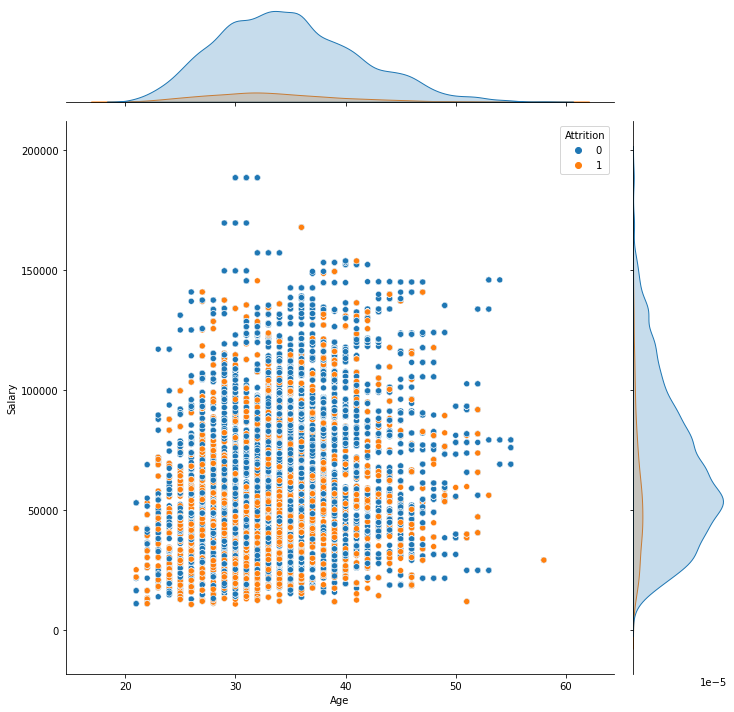

In [18]:
sns.jointplot(data=df,x='Age',y='Salary',hue='Attrition',height=10)

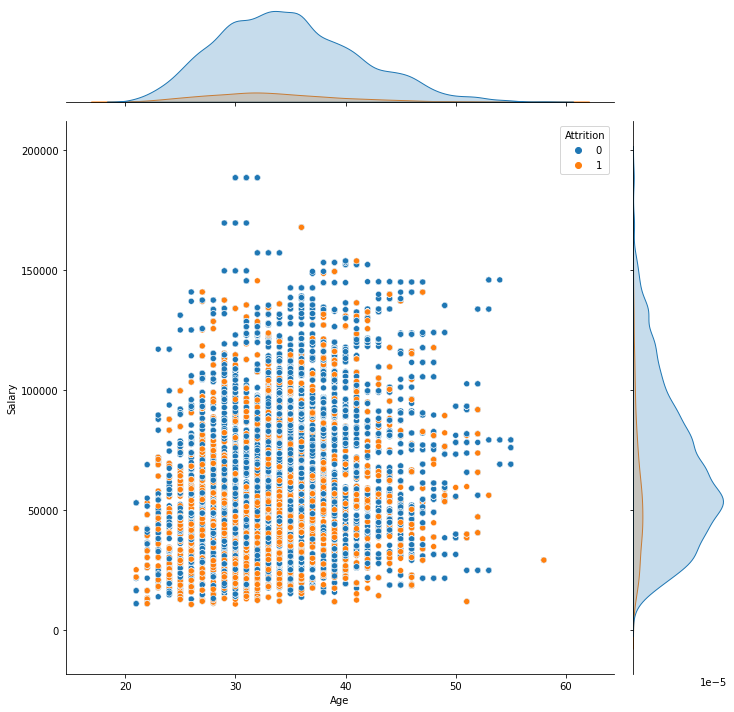

In [19]:
sns.jointplot(data=df,x='Age',y='Salary',hue='Attrition',height=10)

<Figure size 720x432 with 0 Axes>

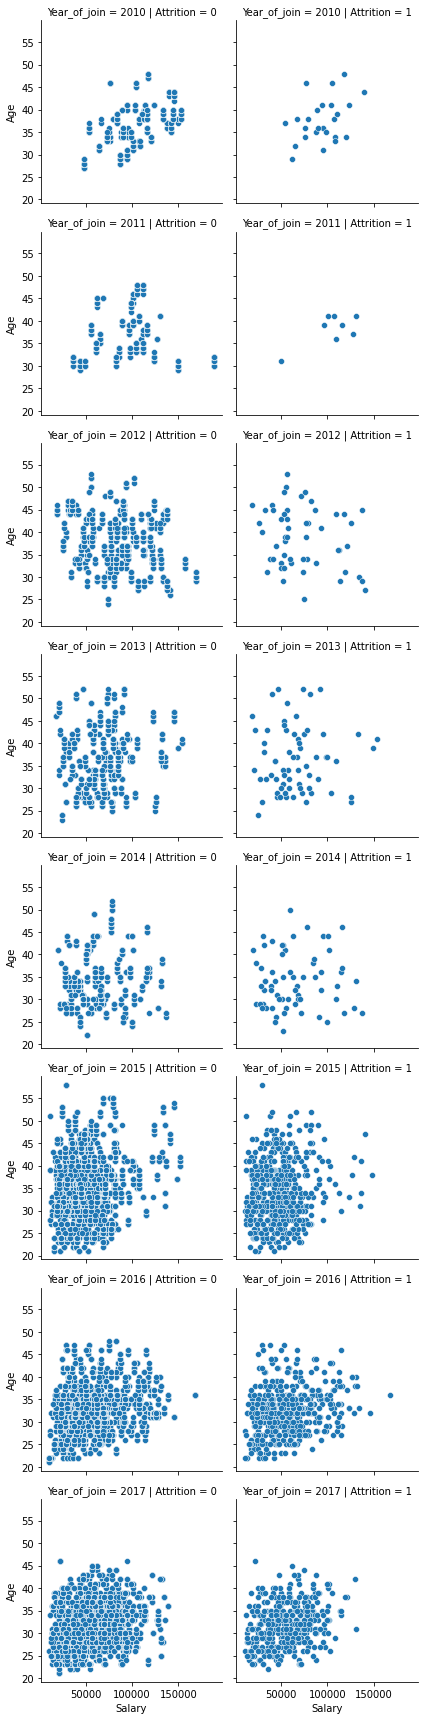

In [20]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(df, col="Attrition",  row='Year_of_join')
fg.map(sns.scatterplot, "Salary", "Age")

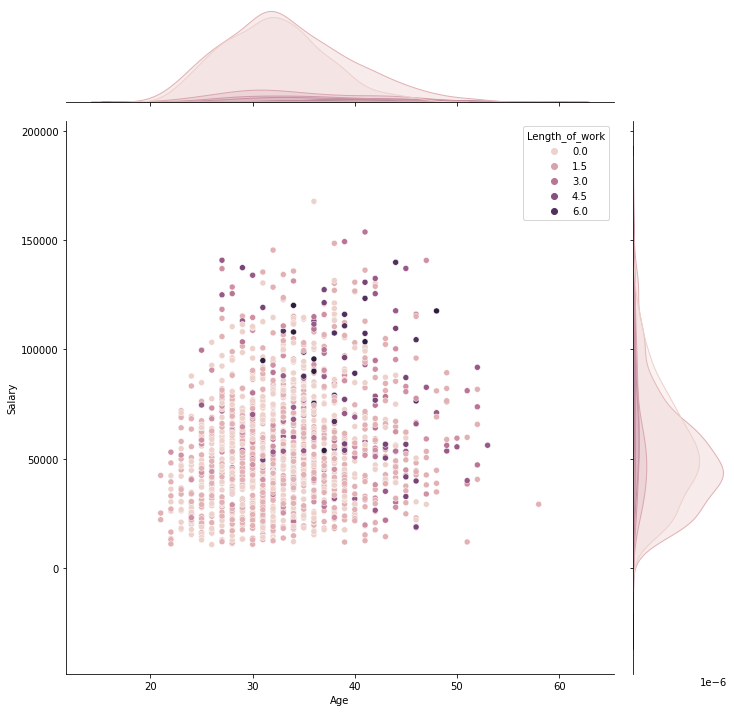

In [21]:
df['Length_of_work'] = df['Year_of_leave'] - df['Year_of_join']
sns.jointplot(data=df,x='Age',y='Salary',hue='Length_of_work',height=10)

<Figure size 720x432 with 0 Axes>

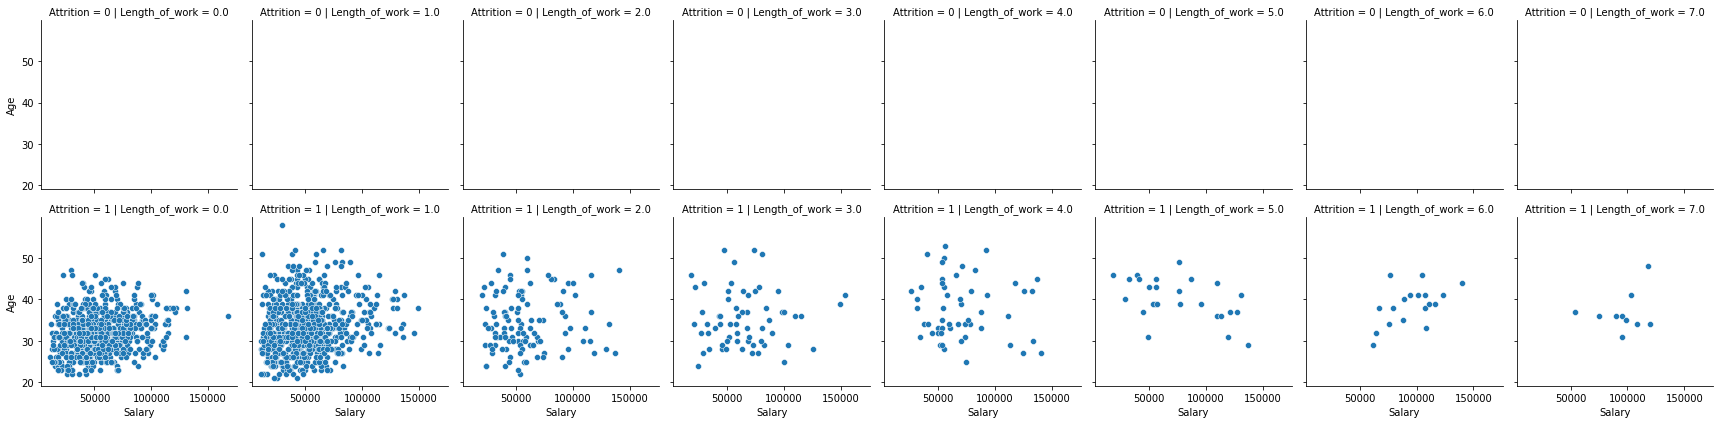

In [22]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(df, col="Length_of_work",  row='Attrition')
fg.map(sns.scatterplot, "Salary", "Age")

<Figure size 720x432 with 0 Axes>

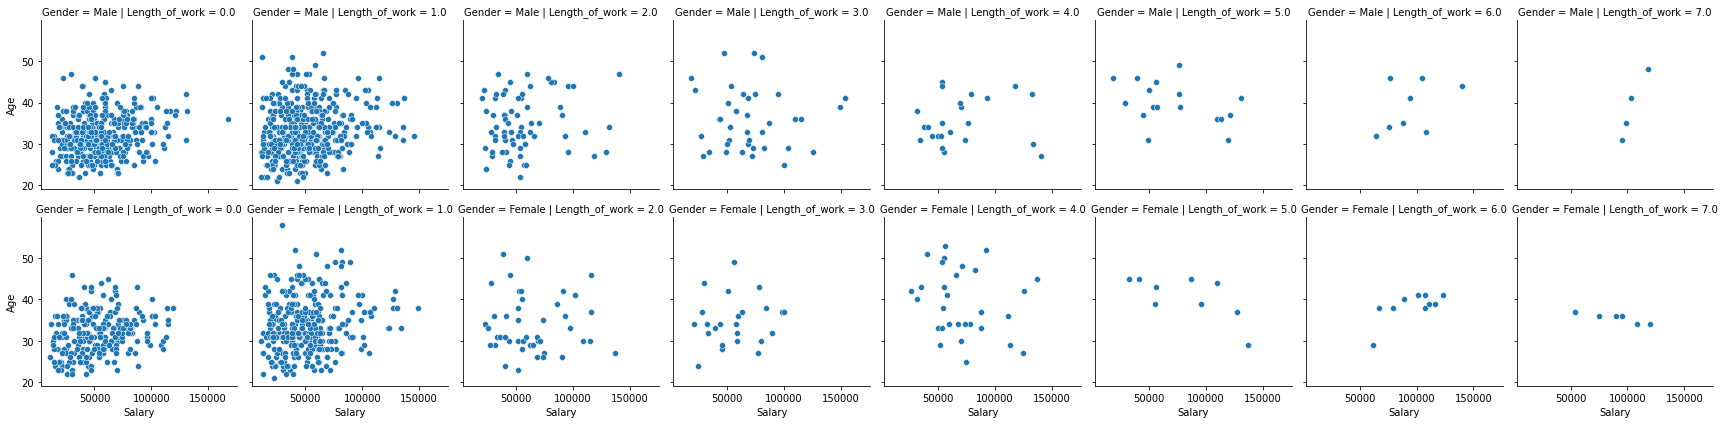

In [23]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(df, col="Length_of_work",  row='Gender')
fg.map(sns.scatterplot, "Salary", "Age")

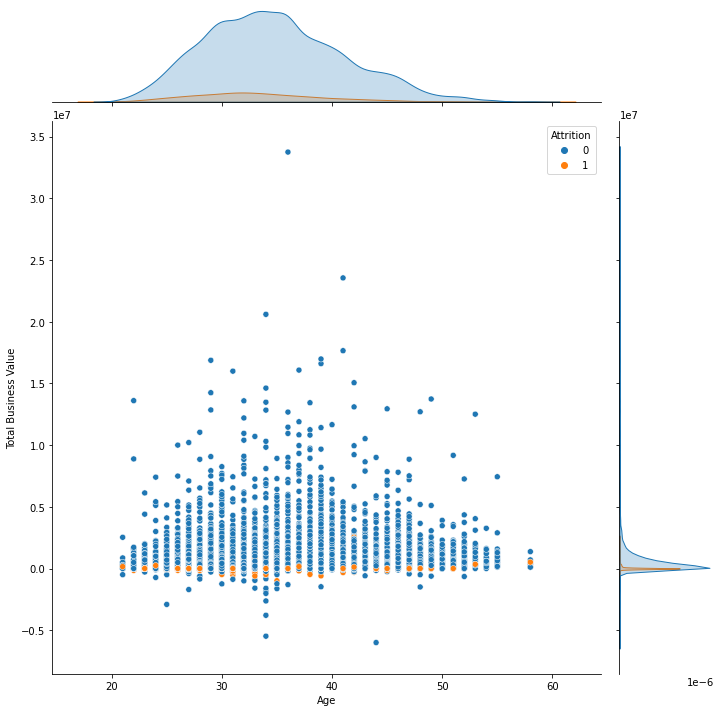

In [24]:
sns.jointplot(data=df,x='Age',y='Total Business Value',hue='Attrition',height=10)

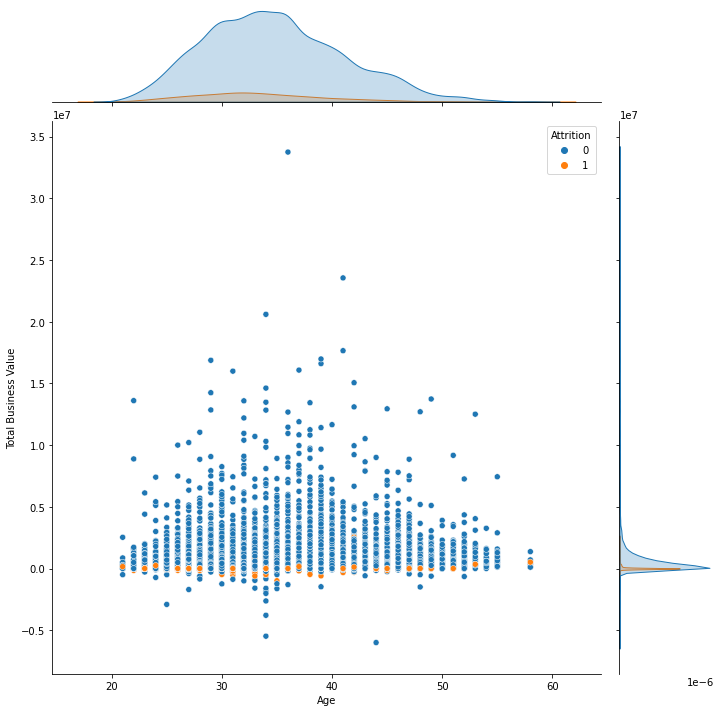

In [25]:
sns.jointplot(data=df,x='Age',y='Total Business Value',hue='Attrition',height=10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Attrition             19104 non-null  int64  
 2   Emp_ID                19104 non-null  int64  
 3   Age                   19104 non-null  int64  
 4   Gender                19104 non-null  object 
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  object 
 7   Salary                19104 non-null  int64  
 8   Year_of_join          19104 non-null  int64  
 9   Month_of_join         19104 non-null  int64  
 10  Day_of_join           19104 non-null  int64  
 11  Joining Designation   19104 non-null  int64  
 12  Designation           19104 non-null  int64  
 13  Total Business Value  19104 non-null  int64  
 14  Quarterly Rating      19104 non-null  int64  
 15  Year_of_leave      

In [27]:
df.head(1)

,MMM-YY,Attrition,Emp_ID,Age,Gender,City,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_leave,Month_of_leave,Length_of_work
0,2016-01-01,0,1,28,Male,C23,Master,57387,2015,12,24,1,1,2381060,2,NaN,NaN,NaN


In [28]:
sex = pd.get_dummies(df['Gender'],drop_first=True)
city = pd.get_dummies(df['City'])
edu = pd.get_dummies(df['Education_Level'])
train = df.copy()
train.head(1)

,MMM-YY,Attrition,Emp_ID,Age,Gender,City,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_leave,Month_of_leave,Length_of_work
0,2016-01-01,0,1,28,Male,C23,Master,57387,2015,12,24,1,1,2381060,2,NaN,NaN,NaN


In [29]:
train.drop(columns=['MMM-YY','Emp_ID','Gender','City','Education_Level','Joining Designation','Designation','Year_of_leave','Month_of_leave','Length_of_work'],inplace=True)
train = pd.concat([train,sex,city,edu],axis=1)
x = train.drop('Attrition',axis=1)
y = train['Attrition']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

-------------------- LOGISTIC REGRESSION --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8770
           1       0.26      0.01      0.02       782

    accuracy                           0.92      9552
   macro avg       0.59      0.50      0.49      9552
weighted avg       0.86      0.92      0.88      9552

-------------------------------------------------------------


<AxesSubplot:title={'center':'Confusion Matrix'}>

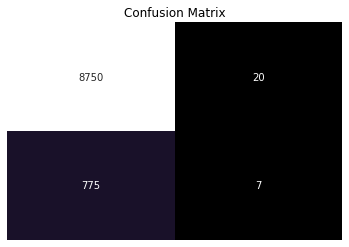

In [30]:
logreg_pred = logreg.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
viz_str = '-'* 20
print(viz_str,'LOGISTIC REGRESSION',viz_str)
print('Classification report:')
print(classification_report(y_test,logreg_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_test,y_test)

DecisionTreeClassifier()

-------------------- DECISION TREE --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8770
           1       1.00      0.62      0.77       782

    accuracy                           0.97      9552
   macro avg       0.98      0.81      0.88      9552
weighted avg       0.97      0.97      0.97      9552

-------------------------------------------------------------


<AxesSubplot:title={'center':'Confusion Matrix'}>

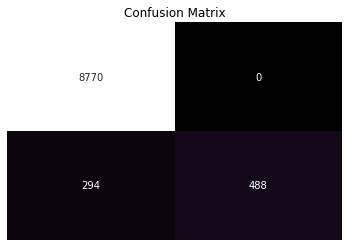

In [32]:
dtree_pred = dtree.predict(x_test)
viz_str = '-'* 20
print(viz_str,'DECISION TREE',viz_str)
print('Classification report:')
print(classification_report(y_test,dtree_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rndfrst = RandomForestClassifier(n_estimators=100)
rndfrst.fit(x_train,y_train)

RandomForestClassifier()

-------------------- RANDOM FOREST --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8770
           1       0.16      0.08      0.10       782

    accuracy                           0.89      9552
   macro avg       0.54      0.52      0.52      9552
weighted avg       0.86      0.89      0.87      9552

-------------------------------------------------------------


<AxesSubplot:title={'center':'Confusion Matrix'}>

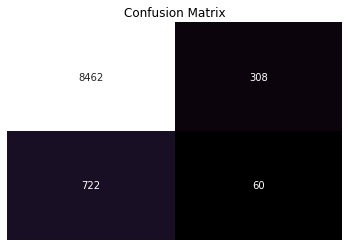

In [34]:
rndfrst_pred = rndfrst.predict(x_test)
viz_str = '-'* 20
print(viz_str,'RANDOM FOREST',viz_str)
print('Classification report:')
print(classification_report(y_test,rndfrst_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rndfrst_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,10],'gamma':[1,0.01,0.001]}
svm = SVC()
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.913 total time=   5.5s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.913 total time=   5.7s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.913 total time=   5.9s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.913 total time=   5.5s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.913 total time=   5.4s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.913 total time=   4.9s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.913 total time=   4.8s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.913 total time=   4.9s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.913 total time=   4.7s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.913 total time=   4.5s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.913 total time=   3.5s
[CV 2/5] END ...............C=0.01, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.01, 0.001]},
             verbose=3)

In [36]:
grid.best_params_

{'C': 0.01, 'gamma': 1}

In [37]:
final_svm = SVC(C=1, gamma=0.01)
final_svm.fit(x_train,y_train)

SVC(C=1, gamma=0.01)

-------------------- KNN --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8770
           1       0.00      0.00      0.00       782

    accuracy                           0.90      9552
   macro avg       0.46      0.49      0.47      9552
weighted avg       0.84      0.90      0.87      9552

-------------------------------------------------------


<AxesSubplot:title={'center':'Confusion Matrix'}>

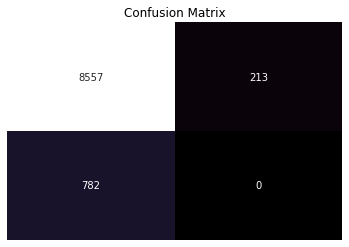

In [38]:
svm_pred = final_svm.predict(x_test)
viz_str = '-'* 20
print(viz_str,'KNN',viz_str)
print('Classification report:')
print(classification_report(y_test,svm_pred))
print('-'*55)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)